In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
#Top 5 records
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#shape of df
df.shape

(10000, 14)

In [5]:
#check NULL values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#Dupicates records
df.duplicated().sum()

0

In [7]:
#Drop Unwanted features
df.drop(columns=['Surname','RowNumber','CustomerId'],inplace=True)

In [8]:
#top 5 records
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

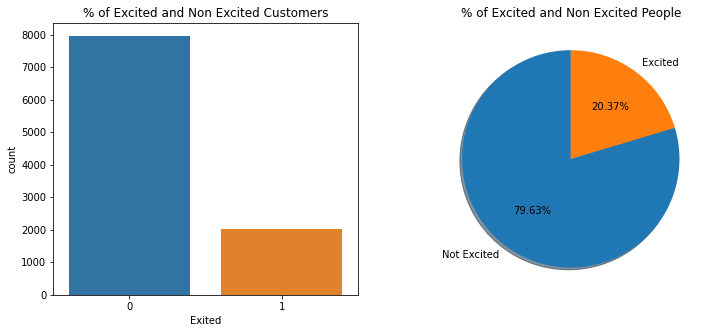

In [10]:
#Excited and Non Excited Customers
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='Exited',data=df)
plt.title("% of Excited and Non Excited Customers")
plt.subplot(1,2,2)
#labels =df['Exited'].value_counts(sort = True).index
sizes = df['Exited'].value_counts(sort = True)
plt.pie(sizes,labels=["Not Excited","Excited"],autopct='%1.2f%%', shadow=True, startangle=90)
plt.title('% of Excited and Non Excited People',size = 12)
plt.show()

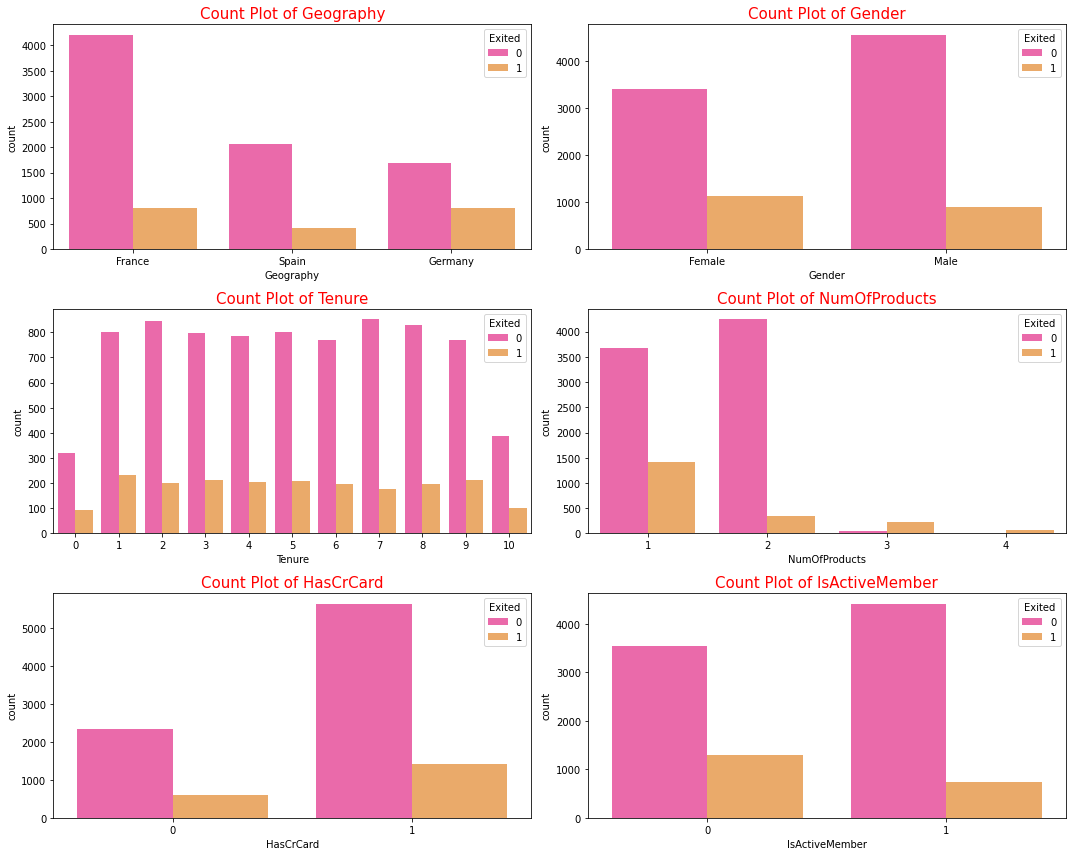

In [11]:
#visualization of categorical features
fig, ax = plt.subplots(3, 2, figsize = (15, 12))
plt.title("Visualization")
sns.countplot('Geography', hue = 'Exited', data = df, ax = ax[0][0],palette='spring')
sns.countplot('Gender', hue = 'Exited', data = df, ax = ax[0][1],palette='spring')
sns.countplot('Tenure', hue = 'Exited', data = df, ax = ax[1][0],palette='spring')
sns.countplot('NumOfProducts', hue = 'Exited', data = df, ax = ax[1][1],palette='spring')
sns.countplot('HasCrCard', hue = 'Exited', data = df, ax = ax[2][0],palette='spring')
sns.countplot('IsActiveMember', hue = 'Exited', data = df, ax = ax[2][1],palette='spring')

ax[0][0].set_title('Count Plot of Geography',color='red',fontsize=15)
ax[0][1].set_title('Count Plot of Gender',color='red',fontsize=15)
ax[1][0].set_title('Count Plot of Tenure',color='red',fontsize=15)
ax[1][1].set_title('Count Plot of NumOfProducts',color='red',fontsize=15)
ax[2][0].set_title('Count Plot of HasCrCard',color='red',fontsize=15)
ax[2][1].set_title('Count Plot of IsActiveMember',color='red',fontsize=15)

plt.tight_layout()
plt.show()

## Visualization of Numerical Features

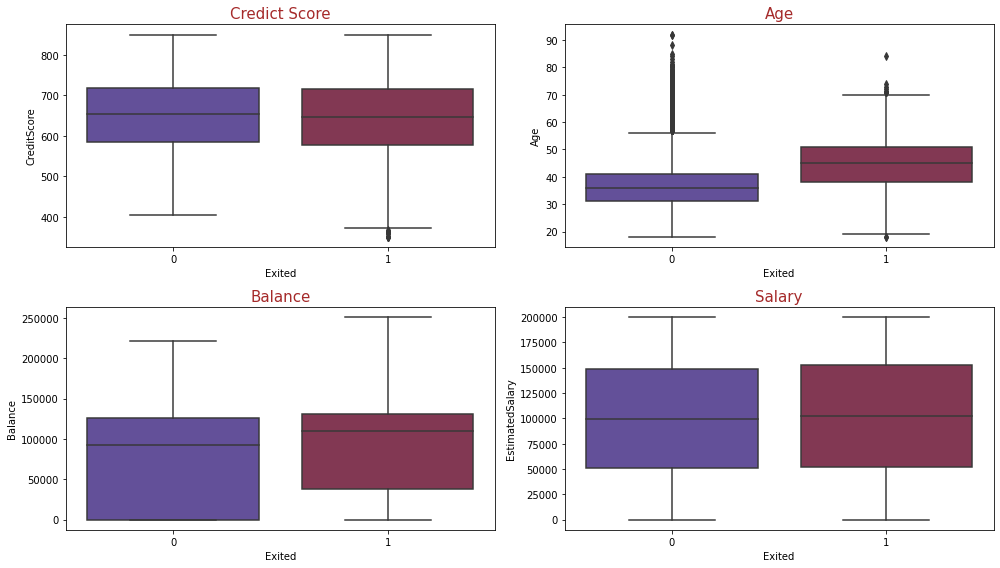

In [12]:
#visualization of Numerical features
fig, ax = plt.subplots(2, 2, figsize = (14, 8))
sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0],palette='twilight')
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1],palette='twilight')
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0],palette='twilight')
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1],palette='twilight')

ax[0][0].set_title('Credict Score',color='brown',fontsize=15)
ax[0][1].set_title('Age',color='brown',fontsize=15)
ax[1][0].set_title('Balance',color='brown',fontsize=15)
ax[1][1].set_title('Salary',color='brown',fontsize=15)
plt.tight_layout()
plt.show()

In [13]:
#statistical info of df
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
Exited,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


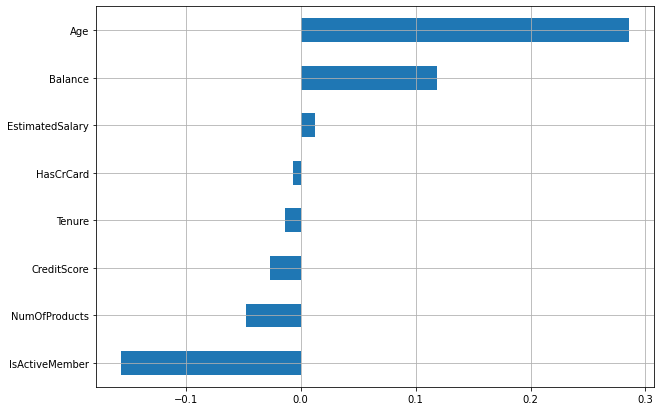

In [14]:
#correlation with target column
plt.figure(figsize=(10,7))
df.corr()['Exited'].sort_values().drop('Exited').plot(kind='barh')
plt.grid(True)
plt.show()

In [15]:
df.corr()['Exited'].sort_values().drop('Exited')

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
HasCrCard         -0.007138
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Name: Exited, dtype: float64

## Correlation-HeatMap

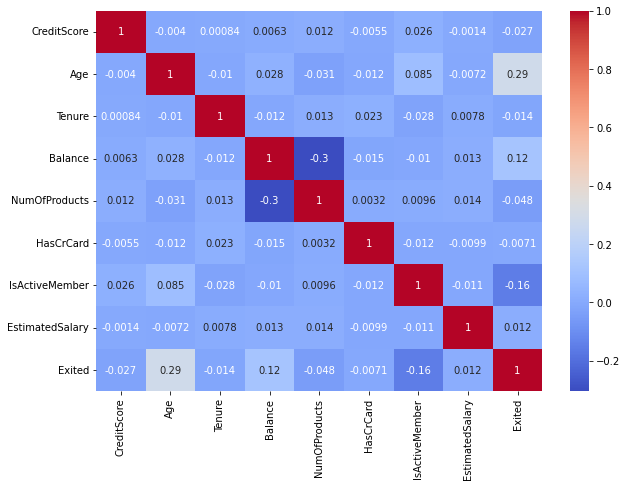

In [16]:
#HeatMap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Label Encoding 

In [18]:
#Label Encoding of Categ features
df['Geography']=df['Geography'].map({'France':0,'Spain':1,'Germany':2})
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


## Input & Output Selection

In [20]:
#Input & Output selection
X=df.drop('Exited',axis=1)
Y=df['Exited']

In [21]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,1,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,1,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64
9996,516,0,0,35,10,57369.61,1,1,1,101699.77
9997,709,0,1,36,7,0.00,1,0,1,42085.58
9998,772,2,0,42,3,75075.31,2,1,0,92888.52


## Train-Test Split

In [22]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=12,stratify=Y)

In [23]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((7000, 10), (3000, 10), (7000,), (3000,))

In [24]:
Y_train.value_counts()
print(5574/1426)

3.908835904628331


In [25]:
Y_test.value_counts()
print(2389/611)

3.909983633387889


## Scaling 

In [26]:
#scaling 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [27]:
X_train

array([[-2.03316213, -0.89904091,  1.09066618, ..., -1.56687074,
        -1.03016917,  0.69493425],
       [ 0.97977277,  1.50756955, -0.91687083, ...,  0.63821474,
         0.97071435,  0.6852219 ],
       [-0.16701906, -0.89904091, -0.91687083, ...,  0.63821474,
        -1.03016917,  1.06135618],
       ...,
       [ 1.32381032, -0.89904091,  1.09066618, ..., -1.56687074,
        -1.03016917,  1.37906669],
       [ 2.0744377 , -0.89904091, -0.91687083, ..., -1.56687074,
        -1.03016917, -1.29480874],
       [-0.10446678, -0.89904091, -0.91687083, ...,  0.63821474,
        -1.03016917, -1.17859385]])

## Build ANN

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

## Model 1 

In [29]:
#build ANN
model=Sequential()
model.add(Dense(units=12,activation='relu',input_shape=(X.shape[1],)))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

2022-08-22 15:49:16.034283: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [31]:
#compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
from tensorflow.keras.callbacks import EarlyStopping             
#create callback : -
cb=EarlyStopping(
    monitor="val_loss",  #val_loss means testing error
    min_delta=0.00001, #value of lambda 
    patience=15,
    verbose=1,
    mode="auto", #minimize loss  #maximize accuracy
    baseline=None,
    restore_best_weights=False
)

In [33]:
trained_model=model.fit(X_train,Y_train,epochs=500,
                        validation_data=(X_test,Y_test),
                        callbacks=cb,
                        batch_size=10
                        )

2022-08-22 15:49:16.433436: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
700/700 [==============================] - 2s 2ms/step - loss: 0.4860 - accuracy: 0.7883 - val_loss: 0.4305 - val_accuracy: 0.8130
Epoch 2/500
700/700 [==============================] - 1s 2ms/step - loss: 0.4128 - accuracy: 0.8257 - val_loss: 0.4112 - val_accuracy: 0.8220
Epoch 3/500
700/700 [==============================] - 1s 2ms/step - loss: 0.3943 - accuracy: 0.8306 - val_loss: 0.4016 - val_accuracy: 0.8263
Epoch 4/500
700/700 [==============================] - 1s 2ms/step - loss: 0.3805 - accuracy: 0.8400 - val_loss: 0.3880 - val_accuracy: 0.8423
Epoch 5/500
700/700 [==============================] - 1s 2ms/step - loss: 0.3660 - accuracy: 0.8526 - val_loss: 0.3749 - val_accuracy: 0.8473
Epoch 6/500
700/700 [==============================] - 1s 2ms/step - loss: 0.3558 - accuracy: 0.8557 - val_loss: 0.3660 - val_accuracy: 0.8507
Epoch 7/500
700/700 [==============================] - 1s 2ms/step - loss: 0.3494 - accuracy: 0.8586 - val_loss: 0.3629 - val_accuracy: 0.8523

In [34]:
trained_model.history['accuracy']

[0.7882857322692871,
 0.8257142901420593,
 0.8305714130401611,
 0.8399999737739563,
 0.852571427822113,
 0.8557142615318298,
 0.8585714101791382,
 0.8592857122421265,
 0.8574285507202148,
 0.8591428399085999,
 0.8618571162223816,
 0.8582857251167297,
 0.8605714440345764,
 0.8607142567634583,
 0.8612856864929199,
 0.8617143034934998,
 0.8607142567634583,
 0.8604285717010498,
 0.8607142567634583,
 0.8612856864929199,
 0.8614285588264465,
 0.8600000143051147,
 0.8618571162223816,
 0.8632857203483582,
 0.8601428866386414,
 0.8625714182853699,
 0.8628571629524231,
 0.8612856864929199,
 0.8640000224113464,
 0.8640000224113464,
 0.8605714440345764,
 0.8627142906188965,
 0.8651428818702698,
 0.8621428608894348,
 0.8635714054107666,
 0.8632857203483582,
 0.8617143034934998,
 0.8629999756813049,
 0.8655714392662048,
 0.8627142906188965]

## Model Evaluation

In [35]:
model.evaluate(X_train,Y_train)
print("Training accuracy :",model.evaluate(X_train,Y_train)[1])
print("Training loss :",model.evaluate(X_train,Y_train)[0])

219/219 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8673
Training accuracy : 0.8672857284545898
219/219 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8673
Training loss : 0.31787943840026855


In [36]:
model.evaluate(X_test,Y_test)
print("Testing accuracy :",model.evaluate(X_test,Y_test)[1])
print("Testing loss :",model.evaluate(X_test,Y_test)[0])

94/94 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8540
Testing accuracy : 0.8539999723434448
94/94 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8540
Testing loss : 0.35324978828430176


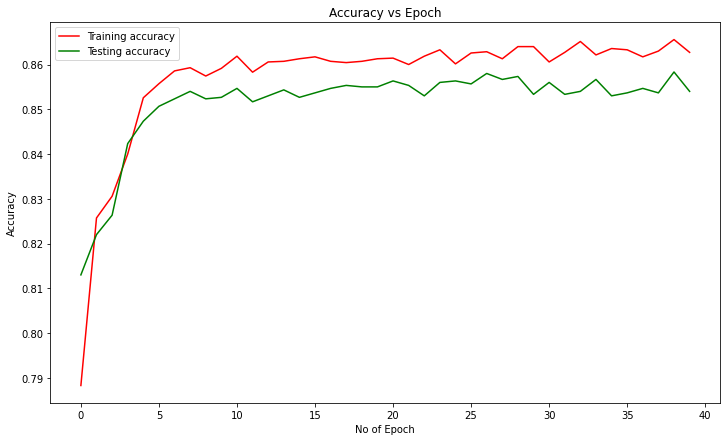

In [37]:
plt.figure(figsize=(12,7))
plt.plot(trained_model.history['accuracy'],label='Training accuracy',color='red')
plt.plot(trained_model.history['val_accuracy'],label='Testing accuracy',color='green')
plt.legend()
plt.xlabel('No of Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Epoch")
plt.show()

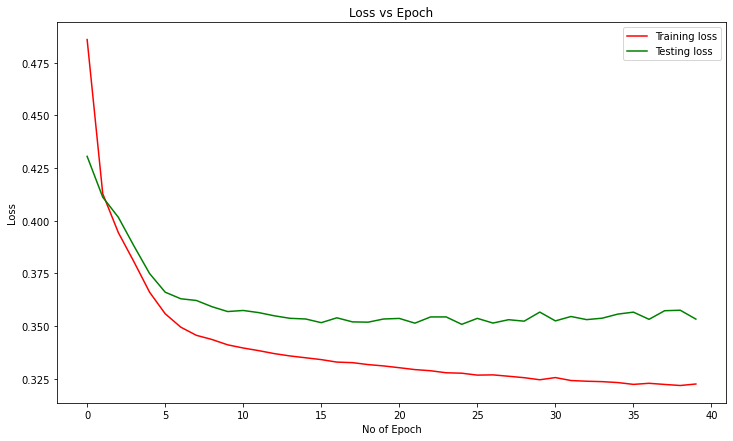

In [38]:
plt.figure(figsize=(12,7))
plt.plot(trained_model.history['loss'],label='Training loss',color='red')
plt.plot(trained_model.history['val_loss'],label='Testing loss',color='green')
plt.legend()
plt.xlabel('No of Epoch')
plt.ylabel('Loss')
plt.title("Loss vs Epoch")
plt.show()

In [39]:
y_pred_prob=model.predict(X_test)
y_pred=np.where(y_pred_prob>0.5,1,0)

In [40]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [41]:
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2389
           1       0.74      0.44      0.55       611

    accuracy                           0.85      3000
   macro avg       0.80      0.70      0.73      3000
weighted avg       0.84      0.85      0.84      3000

[[2295   94]
 [ 344  267]]


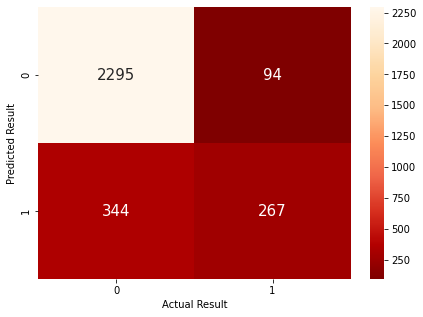

In [42]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,cmap="OrRd_r",
            fmt="d",cbar=True,
            annot_kws={"fontsize":15})
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
plt.show()

## 2. Drop Out Layers

In [43]:
model2=Sequential()
model2.add(Dense(units=30,activation='relu',input_shape=(X.shape[1],)))
model2.add(Dropout(rate = 0.2))
model2.add(Dense(units=18,activation='relu'))
model2.add(Dropout(rate = 0.1))
model2.add(Dense(units=1,activation='sigmoid'))

In [44]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [45]:
trained_model2=model2.fit(X_train,Y_train,epochs=500,
                        validation_data=(X_test,Y_test),
                        callbacks=cb,
                        batch_size=10
                        )

Epoch 1/500
700/700 [==============================] - 2s 2ms/step - loss: 0.4714 - accuracy: 0.7953 - val_loss: 0.4171 - val_accuracy: 0.8257
Epoch 2/500
700/700 [==============================] - 2s 2ms/step - loss: 0.4090 - accuracy: 0.8306 - val_loss: 0.3935 - val_accuracy: 0.8367
Epoch 3/500
700/700 [==============================] - 2s 2ms/step - loss: 0.3849 - accuracy: 0.8397 - val_loss: 0.3763 - val_accuracy: 0.8467
Epoch 4/500
700/700 [==============================] - 2s 2ms/step - loss: 0.3761 - accuracy: 0.8431 - val_loss: 0.3666 - val_accuracy: 0.8527
Epoch 5/500
700/700 [==============================] - 2s 2ms/step - loss: 0.3690 - accuracy: 0.8456 - val_loss: 0.3631 - val_accuracy: 0.8520
Epoch 6/500
700/700 [==============================] - 1s 2ms/step - loss: 0.3674 - accuracy: 0.8461 - val_loss: 0.3611 - val_accuracy: 0.8490
Epoch 7/500
700/700 [==============================] - 2s 2ms/step - loss: 0.3621 - accuracy: 0.8491 - val_loss: 0.3584 - val_accuracy: 0.8533

## Model 2 Evaluation

In [46]:
model2.evaluate(X_train,Y_train)
print("Training accuracy :",model2.evaluate(X_train,Y_train)[1])
print("Training loss :",model2.evaluate(X_train,Y_train)[0])

219/219 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8700
Training accuracy : 0.8700000047683716
219/219 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8700
Training loss : 0.31282487511634827


In [47]:
model2.evaluate(X_test,Y_test)
print("Testing accuracy :",model2.evaluate(X_test,Y_test)[1])
print("Testing loss :",model2.evaluate(X_test,Y_test)[0])

94/94 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8640
Testing accuracy : 0.8640000224113464
94/94 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8640
Testing loss : 0.34784945845603943


In [48]:
model2.evaluate(X_test,Y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8640


[0.34784945845603943, 0.8640000224113464]

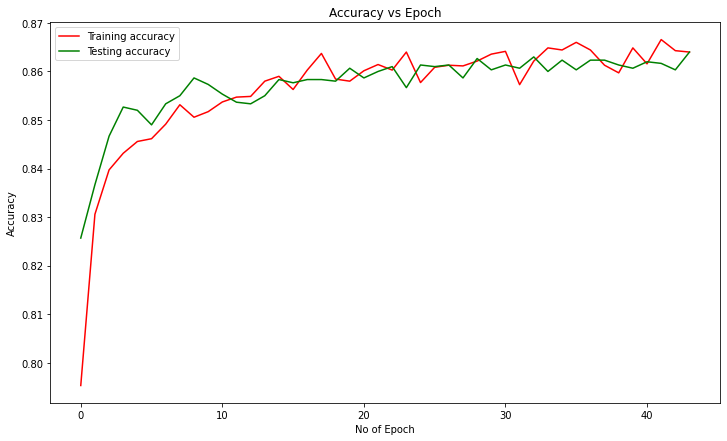

In [49]:
plt.figure(figsize=(12,7))
plt.plot(trained_model2.history['accuracy'],label='Training accuracy',color='red')
plt.plot(trained_model2.history['val_accuracy'],label='Testing accuracy',color='green')
plt.legend()
plt.xlabel('No of Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Epoch")
plt.show()

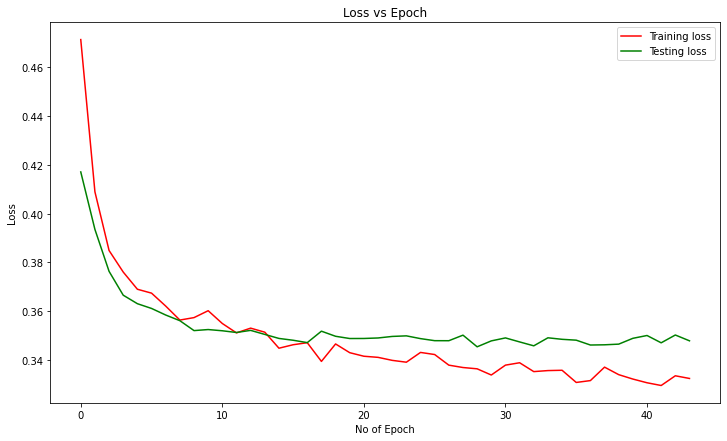

In [50]:
plt.figure(figsize=(12,7))
plt.plot(trained_model2.history['loss'],label='Training loss',color='red')
plt.plot(trained_model2.history['val_loss'],label='Testing loss',color='green')
plt.legend()
plt.xlabel('No of Epoch')
plt.ylabel('Loss')
plt.title("Loss vs Epoch")
plt.show()

In [51]:
y_pred_prob=model2.predict(X_test)
y_pred=np.where(y_pred_prob>0.5,1,0)

In [52]:
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.78      0.46      0.58       611

    accuracy                           0.86      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.86      0.85      3000

[[2311   78]
 [ 330  281]]


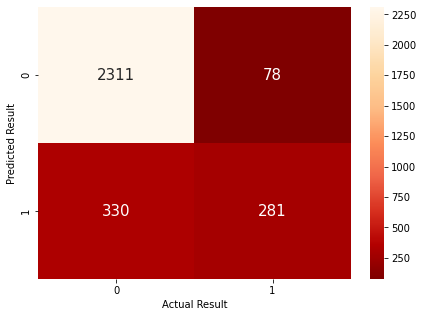

In [53]:
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,cmap="OrRd_r",
            fmt="d",cbar=True,
            annot_kws={"fontsize":15})
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
plt.show()